In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# set default graph size
import pylab
pylab.rcParams['figure.figsize'] = (12,8)  # set default plot size

# Wide versus Long Dataframes

Often when working with data we don't get to choose the format it comes in.  Even when we do, there is no one format that is easiest to work with. Often it can be necessary to convert from wide to long data.

For this post I'm using the Google Spreadsheet that I use to record my cycling data. I keep this in a format that is easy to maintain even though it is not the format I usually work with.  The spreadsheet looks like this.

![Google Cycling Data](images/cycling_gd.png)


# Data Cleanup

While it is possible to connect directly to Google Spreadsheets, for simplicity I'll import the data as a .csv file.  Because of the formatting of the file and fact that I want to change the columns names I'll just skip the top rows and name the columns manually.

In [41]:
columns = ['date', 'FX75', 'BadBoy', 'BMC', 'Sirrus16', 'Sirrus17', 'FX77',
           'Other', 'dow', 'notes', 'doy', 'extra']
data_url = 'https://danecollins.github.io/images/cycling_daily.csv'
df = pd.read_csv(data_url, names=columns, skiprows=6)
df.head()

,date,FX75,BadBoy,BMC,Sirrus16,Sirrus17,FX77,Other,dow,notes,doy,extra
0,12/27/2017,NaN,NaN,NaN,10.9,NaN,NaN,NaN,Wednesday,NaN,175.0,NaN
1,12/25/2017,NaN,NaN,NaN,NaN,15.3,NaN,NaN,Monday,NaN,174.0,NaN
2,12/21/2017,NaN,NaN,NaN,NaN,13.0,NaN,NaN,Thursday,NaN,173.0,NaN
3,12/20/2017,NaN,NaN,NaN,NaN,13.2,NaN,NaN,Wednesday,NaN,172.0,NaN
4,12/19/2017,NaN,NaN,NaN,NaN,11.9,NaN,NaN,Tuesday,NaN,171.0,NaN


Some of these columns we can either re-create or just will not need so let's get rid of them.

In [42]:
unneeded_columns = ['dow', 'notes', 'doy', 'extra']
df.drop(unneeded_columns, axis=1, inplace=True)  # set axis=1 to drop columns,
                                                 # rows are default
df.head()

,date,FX75,BadBoy,BMC,Sirrus16,Sirrus17,FX77,Other
0,12/27/2017,NaN,NaN,NaN,10.9,NaN,NaN,NaN
1,12/25/2017,NaN,NaN,NaN,NaN,15.3,NaN,NaN
2,12/21/2017,NaN,NaN,NaN,NaN,13.0,NaN,NaN
3,12/20/2017,NaN,NaN,NaN,NaN,13.2,NaN,NaN
4,12/19/2017,NaN,NaN,NaN,NaN,11.9,NaN,NaN


We should also look at the bottom of the date to make sure it is correct.

In [43]:
df.tail()

,date,FX75,BadBoy,BMC,Sirrus16,Sirrus17,FX77,Other
987,3/15/2011,NaN,9.7,NaN,NaN,NaN,NaN,NaN
988,3/14/2011,NaN,21,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,By Bike,"1,417","1,784","2,439",1695.9,1490.0,"4,916",208.0
991,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, there are three summary lines at the bottom that we should get rid of.

In [44]:
df.drop([989, 990, 991], inplace=True)  # get rid of those total lines
df.tail()

,date,FX75,BadBoy,BMC,Sirrus16,Sirrus17,FX77,Other
984,3/22/2011,NaN,3.6,NaN,NaN,NaN,NaN,NaN
985,3/21/2011,NaN,14,NaN,NaN,NaN,NaN,NaN
986,3/16/2011,NaN,9.5,NaN,NaN,NaN,NaN,NaN
987,3/15/2011,NaN,9.7,NaN,NaN,NaN,NaN,NaN
988,3/14/2011,NaN,21,NaN,NaN,NaN,NaN,NaN


This looks better.  Next, let's look at what data types did it assign to our columns on readin?

In [45]:
df.dtypes

date         object
FX75         object
BadBoy       object
BMC          object
Sirrus16    float64
Sirrus17    float64
FX77         object
Other       float64
dtype: object

The auto type detection did not work on some of these columns.  Let's fix these types.

In [46]:
columns_to_fix = ['FX75', 'BadBoy', 'BMC', 'FX77']
df[columns_to_fix] = df[columns_to_fix].apply(pd.to_numeric)
df.head()

,date,FX75,BadBoy,BMC,Sirrus16,Sirrus17,FX77,Other
0,12/27/2017,NaN,NaN,NaN,10.9,NaN,NaN,NaN
1,12/25/2017,NaN,NaN,NaN,NaN,15.3,NaN,NaN
2,12/21/2017,NaN,NaN,NaN,NaN,13.0,NaN,NaN
3,12/20/2017,NaN,NaN,NaN,NaN,13.2,NaN,NaN
4,12/19/2017,NaN,NaN,NaN,NaN,11.9,NaN,NaN


Note in this case we specified which columns we wanted to convert.  If we wanted to just try and convert all the columns we could use

    df.apply(pd.to_numeric, errors='ignore')
    
and we would get back a dataframe with all the columns that could be converted converted.

While we're fixing things we might as well convert the date also and recompute the statistics.

In [47]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date        datetime64[ns]
FX75               float64
BadBoy             float64
BMC                float64
Sirrus16           float64
Sirrus17           float64
FX77               float64
Other              float64
dtype: object

# Operating on wide data

We will call this format with the data for each bike in a separate column the wide format. Wide data makes many operations quite simple.  We can look at some basic statistics for each bike with

In [48]:
df.describe()

,FX75,BadBoy,BMC,Sirrus16,Sirrus17,FX77,Other
count,116.000000,140.0000,172.000000,126.000000,96.000000,330.000000,16.000000
mean,12.215517,12.7400,14.177907,13.459524,15.520833,14.897576,12.968750
std,3.428997,4.1464,3.568704,2.895823,3.529393,3.955197,6.727131
min,3.000000,3.0000,7.000000,6.200000,6.000000,3.000000,1.500000
25%,10.475000,10.0000,11.850000,11.550000,13.375000,12.000000,8.850000
50%,11.950000,12.5000,13.750000,12.850000,15.200000,15.000000,14.000000
75%,14.200000,14.0000,16.000000,15.200000,17.025000,17.600000,17.050000
max,20.800000,30.7000,25.300000,22.400000,31.300000,32.900000,25.600000


We can also easily get the total mileage for each bike with

In [49]:
df.sum()

FX75        1417.0
BadBoy      1783.6
BMC         2438.6
Sirrus16    1695.9
Sirrus17    1490.0
FX77        4916.2
Other        207.5
dtype: float64

# Converting Data

Some operations though are more difficult on wide data and prefer long data.  For this data the long format is just:

date        |  bike     | distance
----------  |  -------- | --------
12/27/2017  |  Sirrus16 | 10.9
12/25/2017  |  Sirrus17 | 15.3

Fortunately, pandas provides us a way to convert from wide to long format although it can be a little confusing at first.  A few things to notice.  We will need to:

* keep the date column, this is the id_vars
* create a 'bike' column from the column header, this is the var_name
* create a 'distance' column from the values, these are the value_vars

The conversion is done with the melt function as follows.

In [50]:
bikes = list(df.columns)
bikes.remove('date')
df_long = pd.melt(df, id_vars=['date'], value_vars=bikes, var_name='bike',
                  value_name='distance')
df_long.head()

,date,bike,distance
0,2017-12-27,FX75,NaN
1,2017-12-25,FX75,NaN
2,2017-12-21,FX75,NaN
3,2017-12-20,FX75,NaN
4,2017-12-19,FX75,NaN


It is hard to tell if this works because it has expanded all the NaNs.  Let's remove those.

In [51]:
df_long.dropna(inplace=True)
df_long.head()

,date,bike,distance
270,2016-06-16,FX75,10.9
274,2016-06-09,FX75,8.9
281,2016-05-29,FX75,11.0
282,2016-05-28,FX75,9.5
288,2016-05-19,FX75,11.0


This looks better but let's go ahead and make the date column the index and sort it.

In [52]:
df_long = df_long.set_index('date').sort_index()
df_long.head()

,bike,distance
date,,
2011-03-14,BadBoy,21.0
2011-03-15,BadBoy,9.7
2011-03-16,BadBoy,9.5
2011-03-21,BadBoy,14.0
2011-03-22,BadBoy,3.6


If we already have long data and want wide data we use the pivot table function to do the transformation.  We can get back to the wide dataframe using

In [53]:
new_wide = pd.pivot_table(df_long, index=['date'], columns=['bike'],
                          values=['distance'], aggfunc=[sum])
new_wide.head()

sum                                         
           distance                                         
bike            BMC BadBoy FX75 FX77 Other Sirrus16 Sirrus17
date                                                        
2011-03-14      NaN   21.0  NaN  NaN   NaN      NaN      NaN
2011-03-15      NaN    9.7  NaN  NaN   NaN      NaN      NaN
2011-03-16      NaN    9.5  NaN  NaN   NaN      NaN      NaN
2011-03-21      NaN   14.0  NaN  NaN   NaN      NaN      NaN
2011-03-22      NaN    3.6  NaN  NaN   NaN      NaN      NaN

The main thing to note here is that you must supply a function to aggregate the values.  This is because there could be multiple entries for each date/bike combination.  In this case we need to reduce it to 1 value and that could be any aggregating function such as **len** (the count of the items), **sum** (the sum of the values), **mean** (the average of the values), etc.

# Working with long data

In this format it is now easy to get overall statistics regardless of the bike.

In [54]:
df_long.describe()

,distance
count,996.000000
mean,14.004819
std,3.897647
min,1.500000
25%,11.400000
50%,13.600000
75%,16.100000
max,32.900000


Or even plot a histogram of the distances()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1101ee978>]], dtype=object)

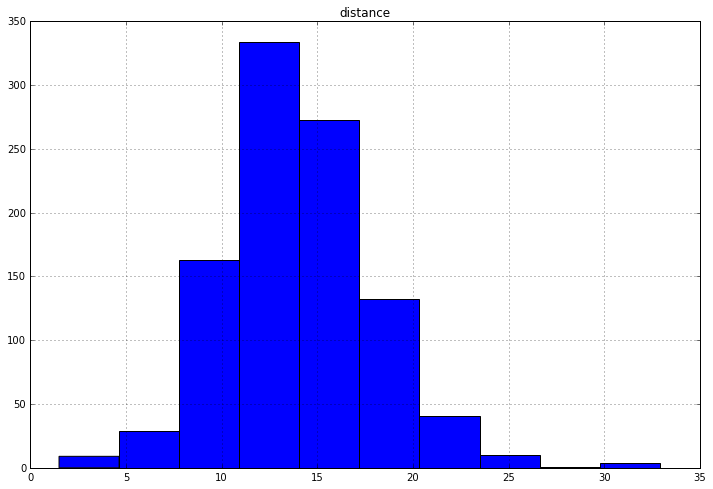

In [55]:
df_long.hist(column='distance')

Next let's look at a boxplot.  In this case, I want to get the boxplot by bike.  This is where having the data in long format shines.

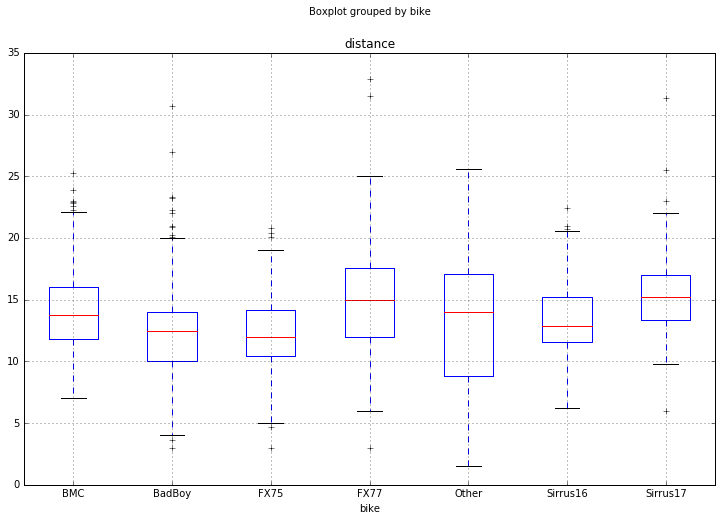

In [56]:
df_long.boxplot(column='distance', by='bike');

# Summary

Hopefully this has provided some insight into some basic data clean up and format conversion and shown some of the benefits of using wide or long data.
